<a href="https://colab.research.google.com/github/jill-05/Machine_Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Prediction of Permittivity Data for the binary mixture of MeOH and BZ.




##Importing Libraries and Reading the Dataset

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz


In [ ]:
file_path = '/content/ML Prediction.xlsx'
data_ml = pd.read_excel(file_path)

In [ ]:
data_ml

Concentration     Frequency              e
0               0.0  2.000000e+01  524711.200000
1               0.0  2.118510e+01  499478.500000
2               0.0  2.244040e+01  473528.400000
3               0.0  2.377000e+01  453456.700000
4               0.0  2.517850e+01  431911.400000
...             ...           ...            ...
2206            1.0  1.590000e+06      17.225849
2207            1.0  1.680000e+06      17.227117
2208            1.0  1.780000e+06      17.228469
2209            1.0  1.890000e+06      17.229507
2210            1.0  2.000000e+06      17.231829

[2211 rows x 3 columns]

##Data Analysis

### Data Preprocessing

In [ ]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Concentration  2211 non-null   float64
 1   Frequency      2211 non-null   float64
 2   e              2211 non-null   float64
dtypes: float64(3)
memory usage: 51.9 KB


In [ ]:
data_ml.describe()

Concentration     Frequency              e
count    2211.000000  2.211000e+03    2211.000000
mean        0.366000  1.778424e+05   16806.292356
std         0.308127  3.890651e+05   57189.258513
min         0.000000  2.000000e+01       7.134345
25%         0.091000  3.556560e+02      20.361700
50%         0.285000  6.324560e+03      33.709320
75%         0.614000  1.124680e+05    1480.653332
max         1.000000  2.000000e+06  524711.200000

In [ ]:
sc = StandardScaler()
td= pd.DataFrame(sc.fit_transform(data_ml),
columns = ['Concentration','frequency','e'])
data = pd.DataFrame(td, columns=['Concentration', 'frequency','e'])

In [ ]:
data

Concentration  frequency         e
0         -1.188092  -0.457154  8.883133
1         -1.188092  -0.457151  8.441819
2         -1.188092  -0.457147  7.987959
3         -1.188092  -0.457144  7.636909
4         -1.188092  -0.457140  7.260087
...             ...        ...       ...
2206       2.058061   3.630439 -0.293637
2207       2.058061   3.861815 -0.293637
2208       2.058061   4.118900 -0.293637
2209       2.058061   4.401693 -0.293637
2210       2.058061   4.684486 -0.293637

[2211 rows x 3 columns]

###Visualizing Data

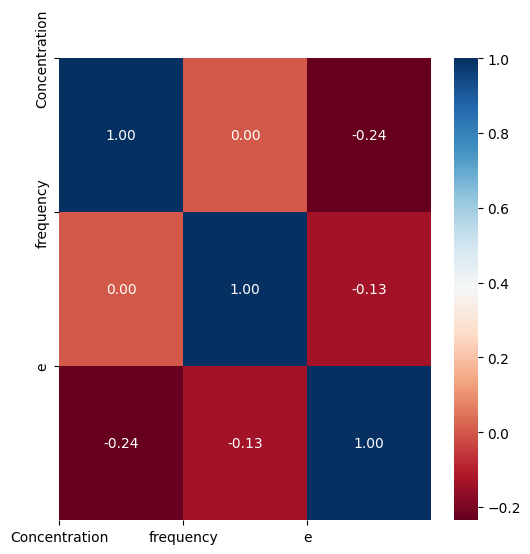

In [ ]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

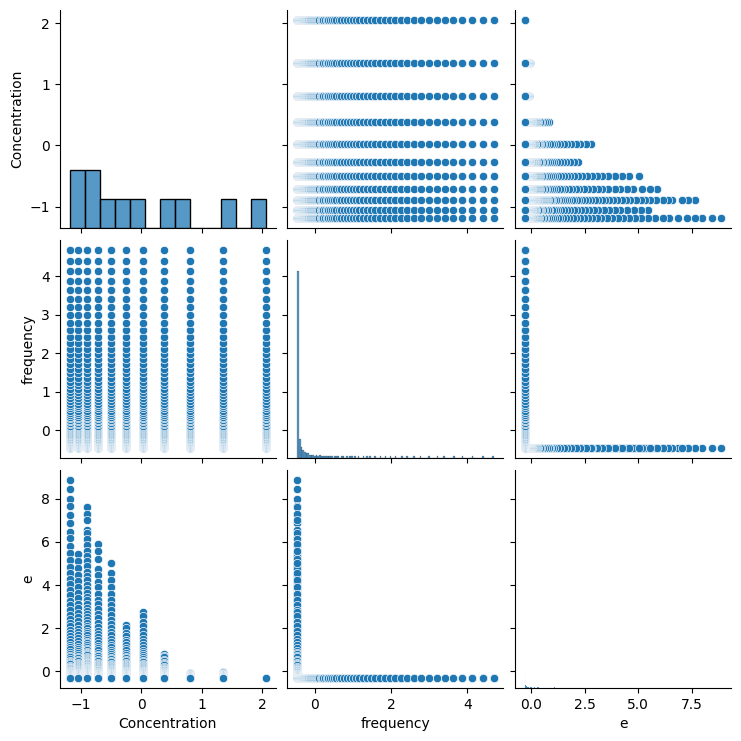

In [ ]:
sns.pairplot(data)
plt.show()

### Splitting Data

In [ ]:
X = data.drop(['e'],axis = 1)
y = data['e']

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1768, 2), (443, 2))

##ML Models

### Decision Tree

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [ ]:
cv_svr_dt = cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt)))

print('CV: ', cv_svr_dt.mean())
print('R2_score (train): ', r2_train_dt)
print('R2_score (test): ', r2_test_dt)
print('Mean Absolute Error: ',mae_dt)
print('Mean Squared Error: ',mse_dt)
print("Root Mean Square Error: %.2f" % rmse_dt)


CV:  0.9758000304791908
R2_score (train):  1.0
R2_score (test):  0.9615559171330248
Mean Absolute Error:  0.041730912976601926
Mean Squared Error:  0.0389715756575587
Root Mean Square Error: 0.20


#### Visualization

[Text(0.12081182776358568, 0.9782608695652174, 'x[1] <= -0.457\nsquared_error = 0.996\nsamples = 1768\nvalue = -0.009'),
 Text(0.03678495149378554, 0.9347826086956522, 'x[0] <= -0.385\nsquared_error = 5.775\nsamples = 146\nvalue = 2.1'),
 Text(0.015317413344998842, 0.8913043478260869, 'x[1] <= -0.457\nsquared_error = 3.856\nsamples = 65\nvalue = 4.251'),
 Text(0.006819176037672731, 0.8478260869565217, 'x[0] <= -1.12\nsquared_error = 2.323\nsamples = 26\nvalue = 5.9'),
 Text(0.0022644810993026425, 0.8043478260869565, 'x[1] <= -0.457\nsquared_error = 0.635\nsamples = 7\nvalue = 7.648'),
 Text(0.0012351715087105324, 0.7608695652173914, 'x[1] <= -0.457\nsquared_error = 0.134\nsamples = 3\nvalue = 8.438'),
 Text(0.0008234476724736883, 0.717391304347826, 'x[1] <= -0.457\nsquared_error = 0.049\nsamples = 2\nvalue = 8.662'),
 Text(0.00041172383623684416, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 8.883'),
 Text(0.0012351715087105324, 0.6739130434782609, 'squared_error = 0.0

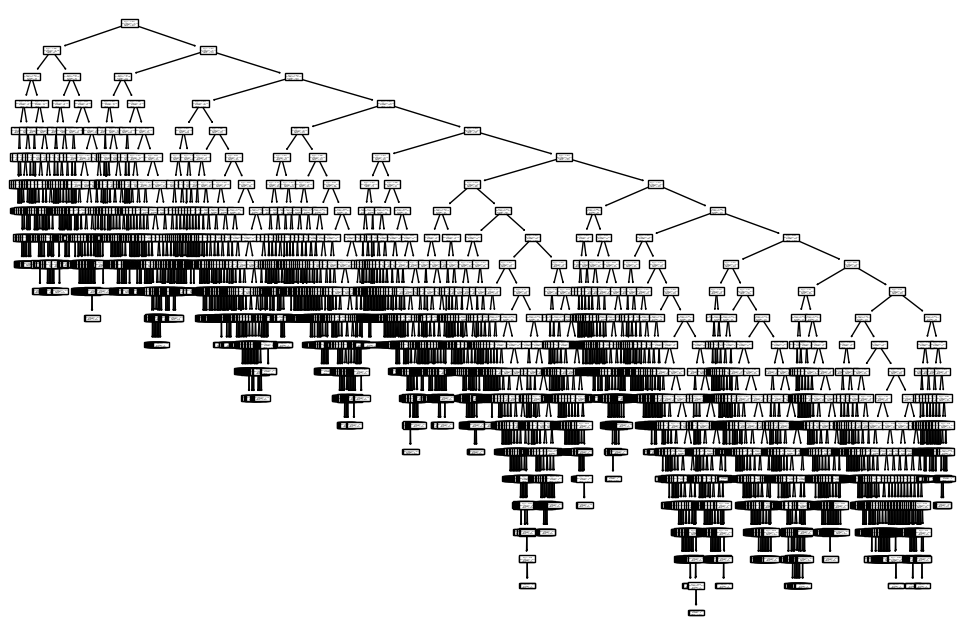

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(regressor.fit(X_train, y_train))

In [ ]:
dot_data = tree.export_graphviz(regressor, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

### LSTM Model

In [ ]:
# Build the LSTM model for regression
model = Sequential()
model.add(Dense(units=50, activation='relu',
                input_dim=X_train.shape[1]))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
56/56 [==============================] - 2s 11ms/step - loss: 0.9150 - val_loss: 0.9065
Epoch 2/10
56/56 [==============================] - 0s 7ms/step - loss: 0.8941 - val_loss: 0.8957
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8866 - val_loss: 0.8912
Epoch 4/10
56/56 [==============================] - 0s 5ms/step - loss: 0.8828 - val_loss: 0.8874
Epoch 5/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8786 - val_loss: 0.8862
Epoch 6/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8761 - val_loss: 0.8835
Epoch 7/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8738 - val_loss: 0.8844
Epoch 8/10
56/56 [==============================] - 0s 5ms/step - loss: 0.8715 - val_loss: 0.8794
Epoch 9/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8706 - val_loss: 0.8765
Epoch 10/10
56/56 [==============================] - 0s 4ms/step - loss: 0.8694 - val_loss: 0.8757


In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.8757


0.8756996989250183

In [ ]:
y_pred_train_lstm = model.predict(X_train)
y_pred_lstm = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
r2_train_lstm = r2_score(y_train, y_pred_train_lstm)
r2_test_lstm = r2_score(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = (np.sqrt(mean_squared_error(y_test, y_pred_lstm)))
cv_cvr_lstm= ' '

print('CV: ',cv_cvr_lstm)
print('R2_score (train): ', r2_train_lstm)
print('R2_score (test): ', r2_test_lstm)
print('Mean Absolute Error: ',mae_lstm)
print('Mean Squared Error: ',mse_lstm)
print("Root Mean Square Error: %.2f" % rmse_lstm)

CV:   
R2_score (train):  0.13156025471882382
R2_score (test):  0.13615315167198327
Mean Absolute Error:  0.4471504358957585
Mean Squared Error:  0.8756997253035969
Root Mean Square Error: 0.94


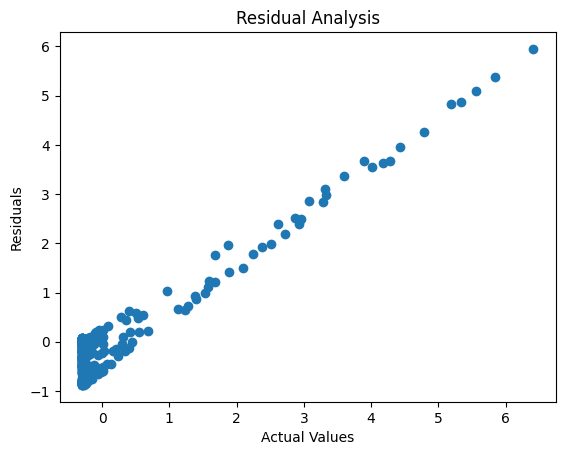

In [ ]:
residuals = y_test - y_pred_lstm.flatten()

# Plot residuals
plt.scatter(y_test, residuals)
plt.title('Residual Analysis')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

### KNN

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_tain_knn = knn_regressor.predict(X_train)
y_pred_knn = knn_regressor.predict(X_test)

In [ ]:
cv_svr_knn = cross_val_score(estimator=knn_regressor,X=X_train,y=y_train,cv=10)
r2_train_knn = r2_score(y_train, y_pred_tain_knn)
r2_test_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_knn)))

print('CV: ', cv_svr_knn.mean())
print('R2_score (train): ', r2_train_knn)
print('R2_score (test): ', r2_test_knn)
print('Mean Absolute Error: ',mae_knn)
print('Mean Squared Error: ',mse_knn)
print("Root Mean Square Error: %.2f" % rmse_knn)

CV:  0.9844833695792639
R2_score (train):  0.9947093355350408
R2_score (test):  0.995743633239875
Mean Absolute Error:  0.018189786326445165
Mean Squared Error:  0.004314768537787715
Root Mean Square Error: 0.07


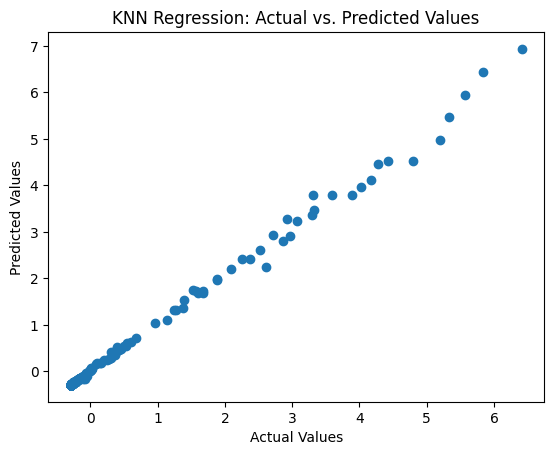

In [ ]:
# Visualize the results (actual vs. predicted)
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.show()

## Measuring the Error

In [ ]:
models = [('Decision Tree Regression', cv_svr_dt.mean(), r2_train_dt, r2_test_dt,mae_dt,mse_dt,rmse_dt),
          ('Long Short-Term Memory', cv_cvr_lstm, r2_train_lstm, r2_test_lstm,mae_lstm,mse_lstm,rmse_lstm),
          ('k-Nearest Neighbors',  cv_svr_knn.mean(), r2_train_knn, r2_test_knn,mae_knn,mse_knn,rmse_knn)]

In [ ]:
predict = pd.DataFrame(data = models,
                       columns=['Model' ,
                                'Cross-Validation' ,
                                'R2_Score(training)',
                                'R2_Score(test)' ,
                                'Mean Absolute Error',
                                'Mean Squared Error' ,
                                'RMSE'])
predict

Model Cross-Validation  R2_Score(training)  \
0  Decision Tree Regression           0.9758            1.000000   
1    Long Short-Term Memory                             0.131560   
2       k-Nearest Neighbors         0.984483            0.994709   

   R2_Score(test)  Mean Absolute Error  Mean Squared Error      RMSE  
0        0.961556             0.041731            0.038972  0.197412  
1        0.136153             0.447150            0.875700  0.935788  
2        0.995744             0.018190            0.004315  0.065687

## Visualizing Model Performance

(0.0, 1.0)

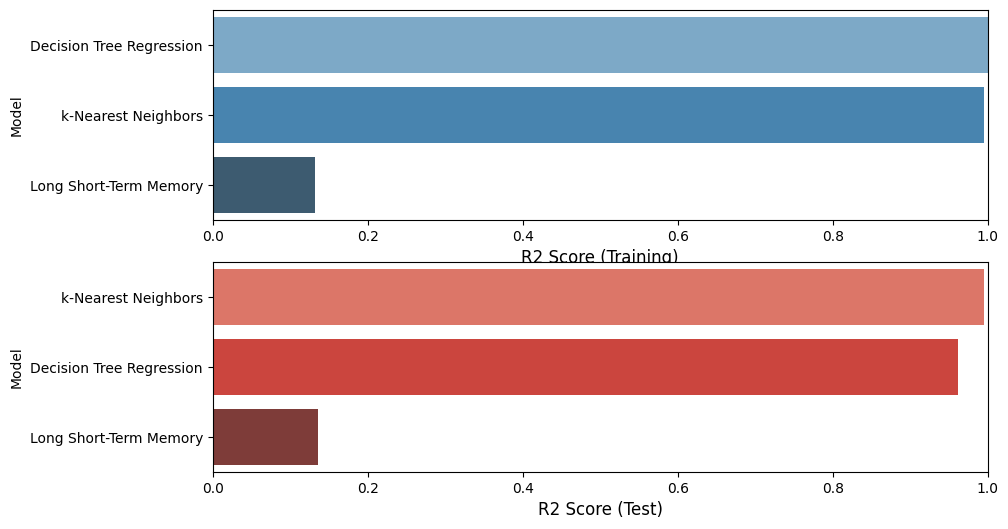

In [ ]:
f, axes = plt.subplots(2,1, figsize=(10,6))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=12)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=12)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

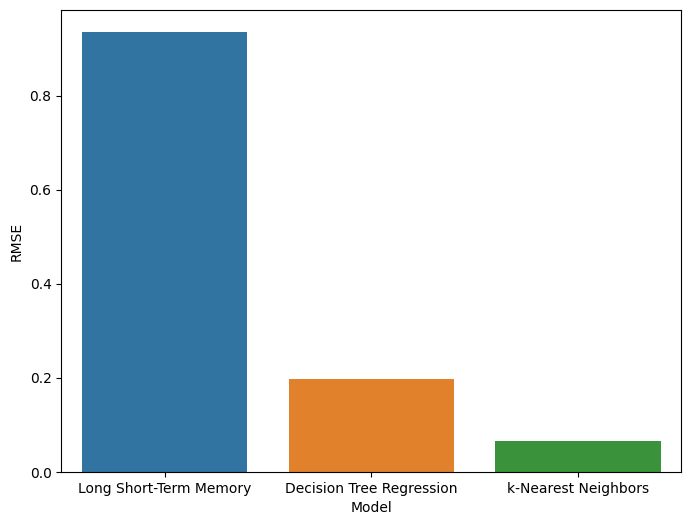

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(8,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('RMSE', size=10)

plt.show()